In [3]:
!pip install beautifulsoup4 requests pandas

In [4]:
# step 1
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Define the URL of the webpage to scrape
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Send an HTTP GET request to the URL with user-agent headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Apply prettify() to format the content
    pretty_html = soup.prettify()

    # Output the result
    #print(pretty_html)
    # Find the table containing the top 50 solar flares data
    table = soup.find('table')

    # Create an empty list to store the data
    data = []

    # Loop through the rows of the table
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')

        # Extract data from each column
        rank = cols[0].text.strip()  # strip to remove tail and head spaces
        x_classification = cols[1].text.strip();x_classification=x_classification.replace('+','')
        date = cols[2].text.strip()
        region = cols[3].text.strip()
        start_time = cols[4].text.strip()
        max_time = cols[5].text.strip()
        end_time = cols[6].text.strip()
        movie = cols[7].text.strip()
        #movie = cols[7].find('a')['href']  # Extract the link to the movie

        # Append the data to the list
        data.append([rank, x_classification, date, region, start_time, max_time, end_time, movie])

    # Create a DataFrame from the list of data
    columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
    df = pd.DataFrame(data, columns=columns)
    #k=df.to_string(index= False)
    #k=k.replace('+','.0')
    # Print the expected output format
    print("Dimension: {} × {}".format(df.shape[0], df.shape[1]))
    print()
    print(df.to_string(index=False))



else:
    print('Failed to retrieve the webpage.')

# This code will scrape the data from SpaceWeatherLive.com and print the first few rows of the DataFrame.

Dimension: 50 × 8

rank x_classification       date region start_time max_time end_time             movie
   1              X28 2003/11/04   0486      19:29    19:53    20:06 MovieView archive
   2              X20 2001/04/02   9393      21:32    21:51    22:03 MovieView archive
   3            X17.2 2003/10/28   0486      09:51    11:10    11:24 MovieView archive
   4              X17 2005/09/07   0808      17:17    17:40    18:03 MovieView archive
   5            X14.4 2001/04/15   9415      13:19    13:50    13:55 MovieView archive
   6              X10 2003/10/29   0486      20:37    20:49    21:01 MovieView archive
   7             X9.4 1997/11/06   8100      11:49    11:55    12:01 MovieView archive
   8             X9.3 2017/09/06   2673      11:53    12:02    12:10 MovieView archive
   9               X9 2006/12/05   0930      10:18    10:35    10:45 MovieView archive
  10             X8.3 2003/11/02   0486      17:03    17:25    17:39 MovieView archive
  11             X8.2 20

In [5]:
#step 2

df = df.drop(columns=['movie'])
# Assuming the time columns are in 24-hour format
df['start_datetime'] = pd.to_datetime(df['date'] + ' ' + df['start_time'], format='%Y/%m/%d %H:%M')
df['max_datetime'] = pd.to_datetime(df['date'] + ' ' + df['max_time'], format='%Y/%m/%d %H:%M')
df['end_datetime'] = pd.to_datetime(df['date'] + ' ' + df['end_time'], format='%Y/%m/%d %H:%M')

# Drop the original date and time columns
df = df.drop(columns=['date', 'start_time', 'max_time', 'end_time'])
df['region'] = df['region'].replace('-', np.nan)
# Save the DataFrame to a CSV file if needed
df.to_csv('solar_flares.csv', index=False)
space_weather_df=df
# Print the expected output format
print("A dataframe: {} × {}".format(df.shape[0], df.shape[1]))
print()
print(df.to_string(index=False))


A dataframe: 50 × 6

rank x_classification region      start_datetime        max_datetime        end_datetime
   1              X28   0486 2003-11-04 19:29:00 2003-11-04 19:53:00 2003-11-04 20:06:00
   2              X20   9393 2001-04-02 21:32:00 2001-04-02 21:51:00 2001-04-02 22:03:00
   3            X17.2   0486 2003-10-28 09:51:00 2003-10-28 11:10:00 2003-10-28 11:24:00
   4              X17   0808 2005-09-07 17:17:00 2005-09-07 17:40:00 2005-09-07 18:03:00
   5            X14.4   9415 2001-04-15 13:19:00 2001-04-15 13:50:00 2001-04-15 13:55:00
   6              X10   0486 2003-10-29 20:37:00 2003-10-29 20:49:00 2003-10-29 21:01:00
   7             X9.4   8100 1997-11-06 11:49:00 1997-11-06 11:55:00 1997-11-06 12:01:00
   8             X9.3   2673 2017-09-06 11:53:00 2017-09-06 12:02:00 2017-09-06 12:10:00
   9               X9   0930 2006-12-05 10:18:00 2006-12-05 10:35:00 2006-12-05 10:45:00
  10             X8.3   0486 2003-11-02 17:03:00 2003-11-02 17:25:00 2003-11-02 17:39:00


In [11]:
#step 3
# Import BeautifulSoup and other libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests

# Define the URL of the webpage to scrape
url = "http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the data
    table = soup.find('pre')

    # Extract text from the table and split it into lines
    table_text = table.get_text()

    # Create a DataFrame to store the data
    columns = [
        "start_date", "start_time", "end_date", "end_time",
        "start_frequency", "end_frequency", "flare_location",
        "flare_region", "flare_classification",
        "cme_date", "cme_time", "cme_angle",
        "cme_width", "cme_speed"
    ]

    # Initialize an empty list to store the data
    data = []

    # Loop through the data lines and split each line into columns using fixed character positions
    for line in table_text.splitlines():
        data_row = [
            line[0:10].strip(), line[11:16].strip(), line[17:23].strip(), line[23:28].strip(),
            line[29:34].strip(), line[35:40].strip(), line[41:50].strip(), line[51:55].strip(),
            line[56:61].strip(), line[62:68].strip(), line[69:74].strip(), line[75:80].strip(),
            line[81:85].strip(), line[86:90].strip()
        ]
        data.append(data_row)

    # Create a DataFrame from the data
    df1 = pd.DataFrame(data[12:-1], columns=columns)

    # Print the expected output format

    print("Dimension: {} × {}".format(df1.shape[0], df1.shape[1]))
    print()
    print(df1.to_string(index=True))

else:
    print('Failed to retrieve the webpage.')


Dimension: 522 × 14

     start_date start_time end_date end_time start_frequency end_frequency flare_location flare_region flare_classification cme_date cme_time cme_angle cme_width cme_speed
0    1997/04/01      14:00    04/01    14:15            8000          4000         S25E16         8026                 M1.3    04/01    15:18        74        79       312
1    1997/04/07      14:30    04/07    17:30           11000          1000         S28E19         8027                 C6.8    04/07    14:27      Halo       360       878
2    1997/05/12      05:15    05/14    16:00           12000            80         N21W08         8038                 C1.3    05/12    05:30      Halo       360       464
3    1997/05/21      20:20    05/21    22:00            5000           500         N05W12         8040                 M1.3    05/21    21:00       263       165       296
4    1997/09/23      21:53    09/23    22:16            6000          2000         S29E25         8088                 

In [12]:
#step 4
import numpy as np
import pandas as pd

# Assuming 'df1' is your DataFrame

# Step 1: Recode any missing entries as NaN based on the data description
missing_codes = {
    "start_date": "--/--", "start_time": "--:--",
    "end_date": "--/--", "end_time": "--:--",
    "start_frequency": "????", "end_frequency": "????",
    "flare_location": "------",
    "flare_region": "----",
    "flare_classification": "----",
    "cme_date": "--/--", "cme_time": "--:--",
    "cme_angle": "Halo","cme_angle": "----",
    "cme_width": "---", "cme_speed": "----","cme_speed": "---"
}

df1.replace(missing_codes, np.nan, inplace=True)

# Step 2: Create a new column 'is_halo' and replace 'Halo' entries in 'cme_angle' with NaN
df1['is_halo'] = df1['cme_angle'] == 'Halo'
df1['cme_angle'] = df1['cme_angle'].replace('Halo', 'NA')

# Convert the 'cme_width' column to a string to apply string operations
df1['cme_width'] = df1['cme_width'].astype(str)

# Step 3: Create a new column 'width_lower_bound' and remove non-numeric parts of 'cme_width'
df1['width_lower_bound'] = df1['cme_width'].str.contains('>', regex=False)
df1['cme_width'] = df1['cme_width'].str.replace(r'[^\\d.]', '', regex=True)
df1['cme_width'] = pd.to_numeric(df1['cme_width'], errors='coerce')  # Convert to float, handling any conversion errors

df1['end_date'] = df1['start_date'].str.extract(r'(\d{4})').iloc[:, 0] + '-' + df1['end_date']
df1['end_date'] = df1['end_date'].replace('/', '-', regex=True)
df1['end_datetime'] = pd.to_datetime(df1['end_date'] + ' ' + df1['end_time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df1['end_datetime'] = pd.to_datetime(df1['end_date'] + ' ' + df1['end_time']+ ':00', format='%Y-%m-%d %H:%M:%S', errors='ignore')


df1['start_datetime'] = pd.to_datetime(df1['start_date'] + ' ' + df1['start_time'], format='%Y/%m/%d %H:%M', errors='coerce')
df1['cme_date'] = df1['start_date'].str.extract(r'(\d{4})').iloc[:, 0] + '-' + df1['cme_date']
df1['cme_date'] = df1['cme_date'].replace('/', '-', regex=True)
df1['cme_datetime'] = pd.to_datetime(df1['cme_date'] + ' ' + df1['cme_time'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
df1['cme_datetime'] = df1['cme_datetime'].fillna(pd.NaT).dt.strftime('%Y-%m-%d %H:%M:%S')

#df['cme_datetime']=pd.to_datetime(df['cme_datetime'], format = '%Y-%m-%d %H:%M:%S', errors='ignore')

# Reorder the columns as needed and add an index column
df1['index'] = range(len(df1))
df1 = df1[['index', 'start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location',
         'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed',
         'is_halo', 'width_lower_bound']]

df1.to_csv('your_data.csv', index=False)
# Print the expected output format
print(df1.to_string(index=False))


 index      start_datetime        end_datetime start_frequency end_frequency flare_location flare_region flare_classification        cme_datetime cme_angle  cme_width cme_speed  is_halo  width_lower_bound
     0 1997-04-01 14:00:00 1997-04-01 14:15:00            8000          4000         S25E16         8026                 M1.3 1997-04-01 15:18:00        74        NaN       312    False              False
     1 1997-04-07 14:30:00 1997-04-07 17:30:00           11000          1000         S28E19         8027                 C6.8 1997-04-07 14:27:00        NA        NaN       878     True              False
     2 1997-05-12 05:15:00 1997-05-14 16:00:00           12000            80         N21W08         8038                 C1.3 1997-05-12 05:30:00        NA        NaN       464     True              False
     3 1997-05-21 20:20:00 1997-05-21 22:00:00            5000           500         N05W12         8040                 M1.3 1997-05-21 21:00:00       263        NaN       296    

#Question 1: Replication
Can you replicate the top 50 solar flare table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events?

Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

In [14]:
#part-2 Q1
import pandas as pd

# Assuming you have a DataFrame 'df' with NASA data

# Custom sorting function to handle 'flare_classification'
def custom_sort(value):
    if isinstance(value, str) and value.startswith('X'):
        try:
            return float(value[1:])
        except ValueError:
            return 0.0
    elif isinstance(value, float):
        return value
    return 0.0

# Apply the custom sorting function to the 'flare_classification' column
df1['sortable_flare_classification'] = df1['flare_classification'].apply(custom_sort)

# Step 1: Sort the NASA data based on the custom sorting column in descending order
df1.sort_values(by='sortable_flare_classification', ascending=False, inplace=True)

# Step 2: Select the top 50 solar flares
top_50_solar_flares = df1.head(50)

# Reset the index to start from 1
top_50_solar_flares.reset_index(drop=True, inplace=True)
# Add 1 to the index to start from 1
#top_50_solar_flares.index += 1
# Assuming you have a DataFrame named 'top_50_solar_flares' containing the top 50 solar flares
# Create a copy of the DataFrame
top_50_solar_flares = top_50_solar_flares.copy()

# Add a new 'rank' column starting from 1 to the copied DataFrame
top_50_solar_flares['rank'] = range(1, len(top_50_solar_flares) + 1)
top_50_nasa_data=top_50_solar_flares.copy()
# Reorder the columns to place 'rank' as the first column in the copied DataFrame
top_50_solar_flares = top_50_solar_flares[['rank', 'flare_classification', 'flare_region', 'start_datetime', 'cme_datetime', 'end_datetime']]



# Display the top 50 solar flares from NASA data
#top_50_solar_flares = top_50_solar_flares[['flare_classification', 'flare_region','start_datetime', 'cme_datetime', 'end_datetime']]

print(top_50_solar_flares.to_string(index=False))


 rank flare_classification flare_region      start_datetime        cme_datetime        end_datetime
    1                 X28.         0486 2003-11-04 20:00:00 2003-11-04 19:54:00 2003-11-04 24:00:00
    2                 X20.         9393 2001-04-02 22:05:00 2001-04-02 22:06:00 2001-04-03 02:30:00
    3                 X17.         0486 2003-10-28 11:10:00 2003-10-28 11:30:00 2003-10-29 24:00:00
    4                 X14.         9415 2001-04-15 14:05:00 2001-04-15 14:06:00 2001-04-16 13:00:00
    5                 X10.         0486 2003-10-29 20:55:00 2003-10-29 20:54:00 2003-10-29 24:00:00
    6                 X9.4         8100 1997-11-06 12:20:00 1997-11-06 12:10:00 1997-11-07 08:30:00
    7                 X9.3         2673 2017-09-06 12:05:00 2017-09-06 12:24:00 2017-09-07 08:00:00
    8                 X9.0         0930 2006-12-05 10:50:00                 NaN 2006-12-05 20:00:00
    9                 X8.3          NaN 2017-09-10 16:02:00 2017-09-10 16:00:00 2017-09-11 06:50:00


#Question 2: Integration
Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. Here, you have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares.

In your submission, include an explanation of how you are defining best matching rows across the two datasets in addition to the code used to find the best matches. Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

In [15]:
import pandas as pd

def find_best_matching_nasa_rows(space_weather_df, nasa_df):
    # Initialize a new column 'nasa_rank' with NaN in the NASA DataFrame
    nasa_df['nasa_rank'] = float('nan')

    # Loop through each row in the SpaceWeatherLive data
    for idx, space_weather_row in space_weather_df.iterrows():
        # Get the values from the SpaceWeatherLive row
        x_classification = space_weather_row['x_classification']
        region = space_weather_row['region']

        # Remove the dot '.' from 'flare_classification' in the NASA data
        nasa_df['flare_classification_no_dot'] = nasa_df['flare_classification'].str.rstrip('.')

        # Find the matching rows in the NASA data based on 'flare_classification' (without dot) and 'flare_region'
        matching_rows = nasa_df[(nasa_df['flare_classification_no_dot'] == x_classification) & (nasa_df['flare_region'] == region)]

        if not matching_rows.empty:
            # Get the rank of the best matching row
            best_match_rank = matching_rows['rank'].values[0]

            # Update the 'nasa_rank' in the NASA data with the NASA rank
            nasa_df.at[best_match_rank - 1, 'nasa_rank'] = idx + 1

    # Drop the temporary column 'flare_classification_no_dot'
    nasa_df.drop(columns=['flare_classification_no_dot'], inplace=True)

    return nasa_df

# Call the function to find the best matching rows
nasa_df = find_best_matching_nasa_rows(df, top_50_solar_flares)
print(nasa_df.to_string(index=False))
# Now, the 'nasa_rank' column in the NASA data indicates the rank of each entry in the SpaceWeatherLive data.


 rank flare_classification flare_region      start_datetime        cme_datetime        end_datetime  nasa_rank
    1                 X28.         0486 2003-11-04 20:00:00 2003-11-04 19:54:00 2003-11-04 24:00:00        1.0
    2                 X20.         9393 2001-04-02 22:05:00 2001-04-02 22:06:00 2001-04-03 02:30:00        2.0
    3                 X17.         0486 2003-10-28 11:10:00 2003-10-28 11:30:00 2003-10-29 24:00:00        NaN
    4                 X14.         9415 2001-04-15 14:05:00 2001-04-15 14:06:00 2001-04-16 13:00:00        NaN
    5                 X10.         0486 2003-10-29 20:55:00 2003-10-29 20:54:00 2003-10-29 24:00:00        6.0
    6                 X9.4         8100 1997-11-06 12:20:00 1997-11-06 12:10:00 1997-11-07 08:30:00        7.0
    7                 X9.3         2673 2017-09-06 12:05:00 2017-09-06 12:24:00 2017-09-07 08:00:00        8.0
    8                 X9.0         0930 2006-12-05 10:50:00                 NaN 2006-12-05 20:00:00        NaN
 

In [16]:
import pandas as pd

# Your DataFrame
top_50_nasa_data = top_50_nasa_data[['rank', 'start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location',
         'flare_region', 'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed',
         'is_halo', 'width_lower_bound']]
#Save the DataFrame to a CSV file if needed
top_50_solar_flares.to_csv('NASA.csv', index=False)
# Now your "start_datetime" and "end_datetime" should be adjusted
print(top_50_nasa_data.to_string(index=False))


 rank      start_datetime        end_datetime start_frequency end_frequency flare_location flare_region flare_classification        cme_datetime cme_angle  cme_width cme_speed  is_halo  width_lower_bound
    1 2003-11-04 20:00:00 2003-11-04 24:00:00           10000           200         S19W83         0486                 X28. 2003-11-04 19:54:00        NA        NaN       657     True              False
    2 2001-04-02 22:05:00 2001-04-03 02:30:00           14000           250         N19W72         9393                 X20. 2001-04-02 22:06:00       261        NaN       505    False              False
    3 2003-10-28 11:10:00 2003-10-29 24:00:00           14000            40         S16E08         0486                 X17. 2003-10-28 11:30:00        NA        NaN       459     True              False
    4 2001-04-15 14:05:00 2001-04-16 13:00:00           14000            40         S20W85         9415                 X14. 2001-04-15 14:06:00       245        NaN       199    False

# Analysis

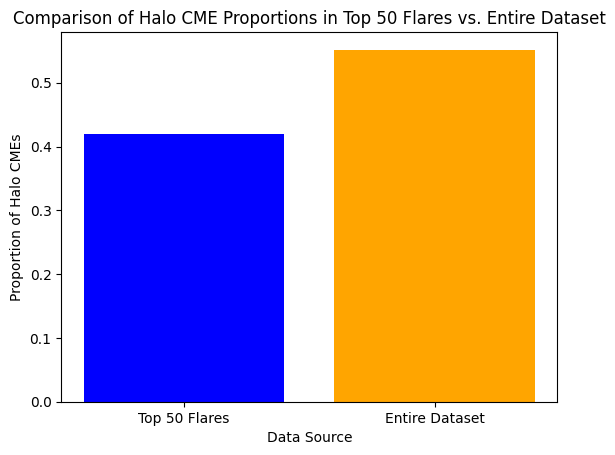

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your NASA dataset (replace 'your_data.csv' with the actual file path or URL)
nasa_df = pd.read_csv('your_data.csv')

# Filter the top 50 flares from the NASA dataset
top_50_flares = nasa_df.head(50)

# Calculate the proportion of Halo CMEs in the top 50 flares
top_50_proportion_halo = top_50_flares['is_halo'].mean()

# Calculate the proportion of Halo CMEs in the entire dataset
all_proportion_halo = nasa_df['is_halo'].mean()

# Create a bar plot to compare the proportions of Halo CMEs in the top 50 vs. the entire dataset
labels = ['Top 50 Flares', 'Entire Dataset']
proportions = [top_50_proportion_halo, all_proportion_halo]

plt.bar(labels, proportions, color=['blue', 'orange'])
plt.xlabel('Data Source')
plt.ylabel('Proportion of Halo CMEs')
plt.title('Comparison of Halo CME Proportions in Top 50 Flares vs. Entire Dataset')
plt.show()
